In [1]:
# import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
ords_prods_merge = pd.read_pickle(r'/Volumes/My Passport/orders_products_merge_new.pkl')

In [4]:
ords_prods_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,both,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,14084,2,0,both,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,12427,3,0,both,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,26088,4,0,both,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,26405,5,0,both,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
# creating a sampling 

np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [6]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [7]:
np.random.rand(10)

array([0.79555729, 0.6652899 , 0.04000166, 0.90958442, 0.0493868 ,
       0.6829014 , 0.09612088, 0.92855965, 0.51356997, 0.69561069])

In [8]:
# store 70% of the sample in the dataframe big

big = ords_prods_merge[dev]

In [9]:
# store 30% of the sample in the dataframe small

small = ords_prods_merge[~dev]

In [10]:
len(ords_prods_merge)

32435059

In [11]:
len(big) + len(small)

32435059

# 3. Histogram of 'order_hour_of_day' column

In [12]:
df = small[['order_hour_of_day']]

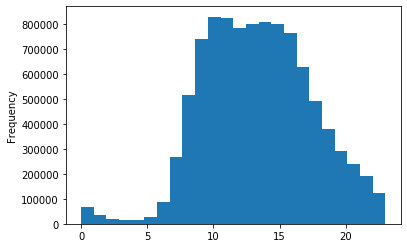

In [25]:
# histogram of order hour of day

hist = df['order_hour_of_day'].plot.hist(bins = 24)

### This histogram shows that most orders are made around 10am-12pm. The bulk of the orders range from 8am-4pm. 

# 4. loyalty_flag bar chart

In [15]:
df_2 = big[['loyalty_flag']]

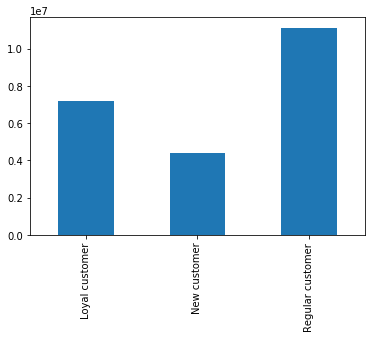

In [26]:
# creating a bar chart for loyalty_flag

bar = df_2['loyalty_flag'].value_counts().sort_index().plot.bar()

# 5. Line graph ('prices', 'hour_of_the_day')

In [19]:
df_3 = big[['prices', 'order_hour_of_day']]

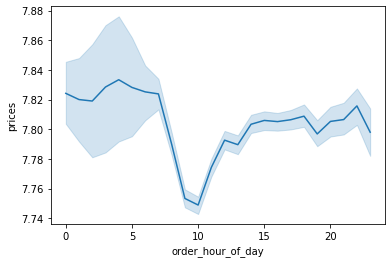

In [23]:
line_2 = sns.lineplot(data = df_3, x = 'order_hour_of_day', y = 'prices')

### The tallest peak is around 4am while the major deep happens at 10am

# 6. Age and Family Status Line Chart

In [21]:
df_4 = big[['age', 'n_dependants']]

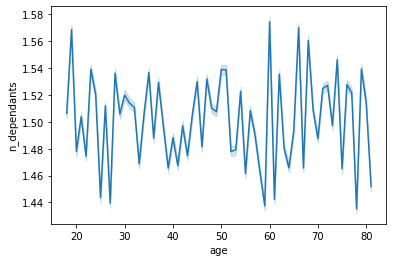

In [22]:
line = sns.lineplot(data = df_4, x = 'age', y = 'n_dependants')

### The intervals are not very steady and goes up and down throughout age. Everyone of the customers have dependants. 

# 7. Scatterplot 

In [30]:
df_5 = small[['income', 'age']]

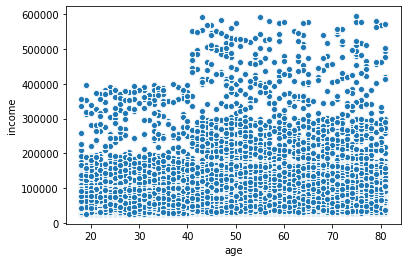

In [31]:
scatt = sns.scatterplot(x = 'age', y = 'income',data = df_5)

### There's no clear connection between the age and income. Majority of the data points are at $30,000 and below.

In [34]:
hist.figure.savefig('order_hour_of_day.png')

In [35]:
bar.figure.savefig('loyalty_flag.png')

In [36]:
line_2.figure.savefig('prices_order_of_hour.png')

In [37]:
line.figure.savefig('age_dependants.png')

In [38]:
scatt.figure.savefig('age_income_scatter.png')